# Heart Failure Clinical Records Dataset

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [93]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [73]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Feature Selection

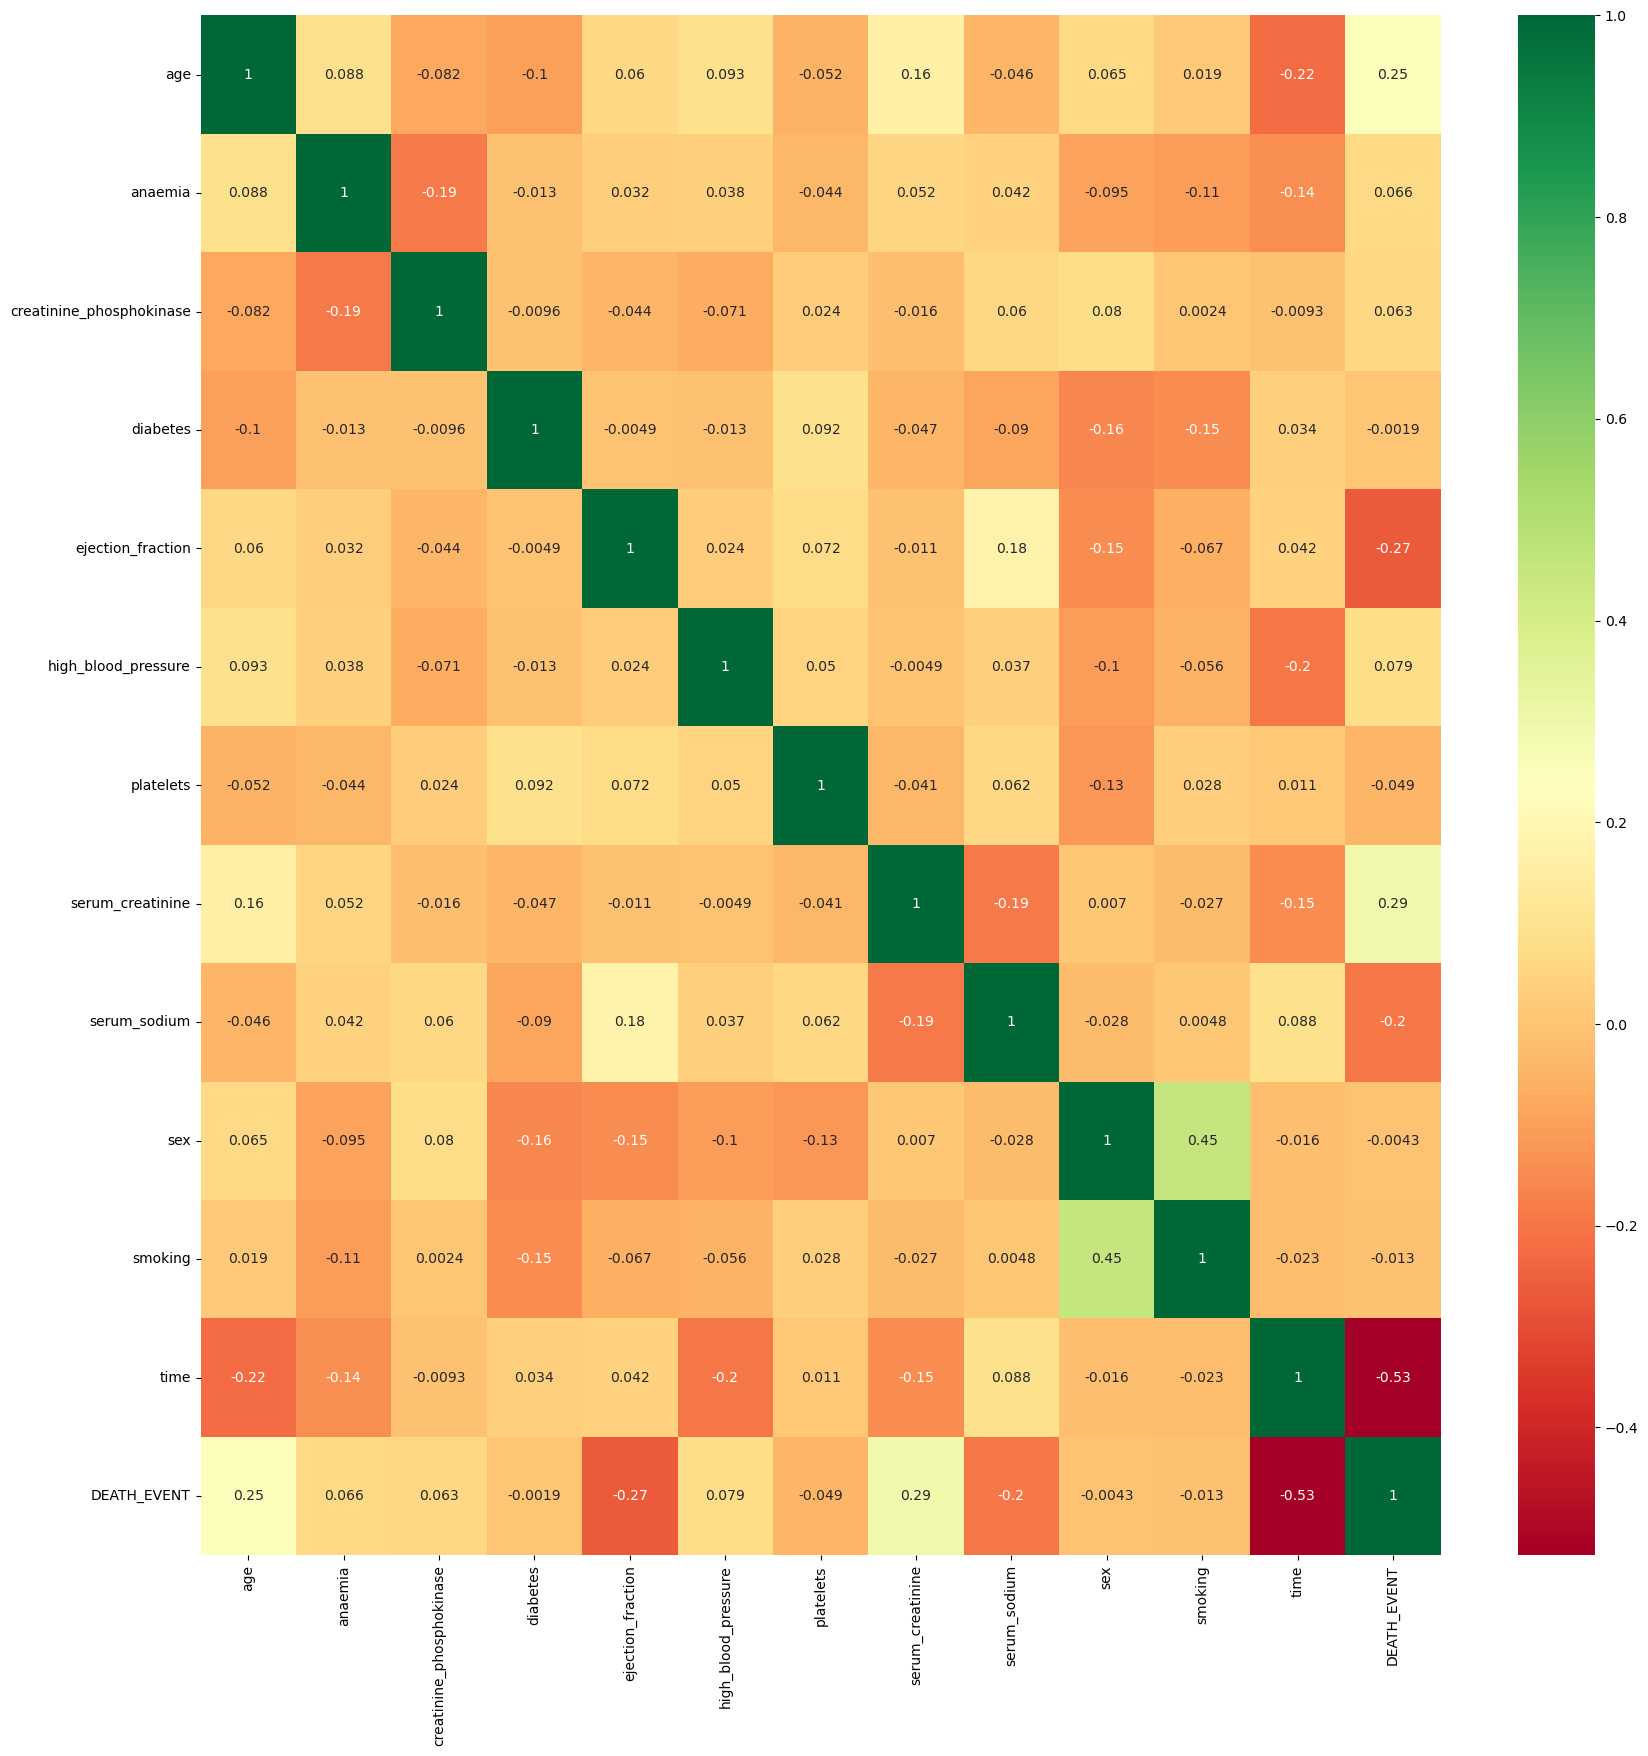

In [74]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

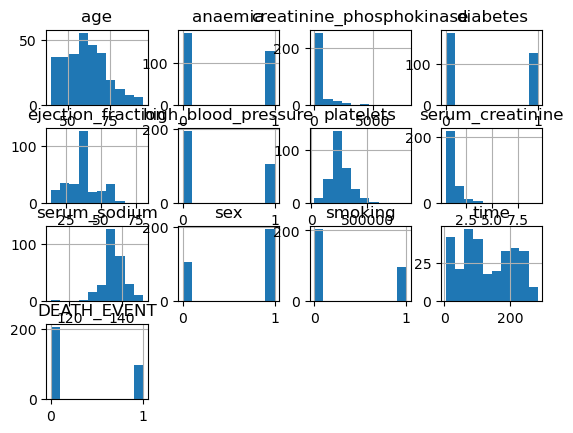

In [75]:
df.hist()

In [76]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [77]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [78]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [95]:
df["sex"] = np.where(df["sex"] < 1, "Female", "Male")
df["smoking"] = np.where(df["smoking"] < 1, "No", "Yes")
df["diabetes"] = np.where(df["diabetes"] < 1, "No", "Yes")
df["DEATH_EVENT"] = np.where(df["DEATH_EVENT"] < 1, "Survived", "Death")

# Questions 

#Q1: What is the distribution of age among heart failure patients in the dataset

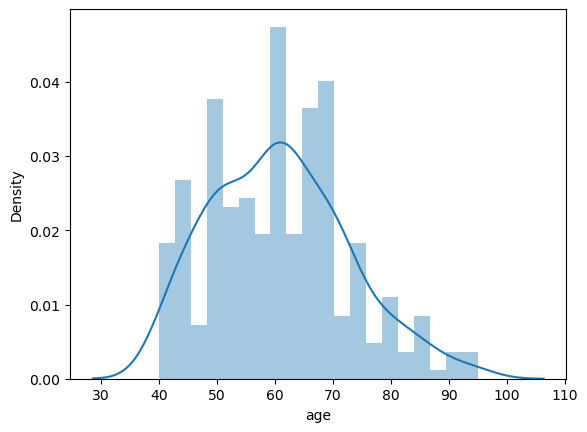

In [96]:
sns.distplot(df['age'],bins=20,kde=True)
plt.show()

#Q2:How does the death rate vary with age?

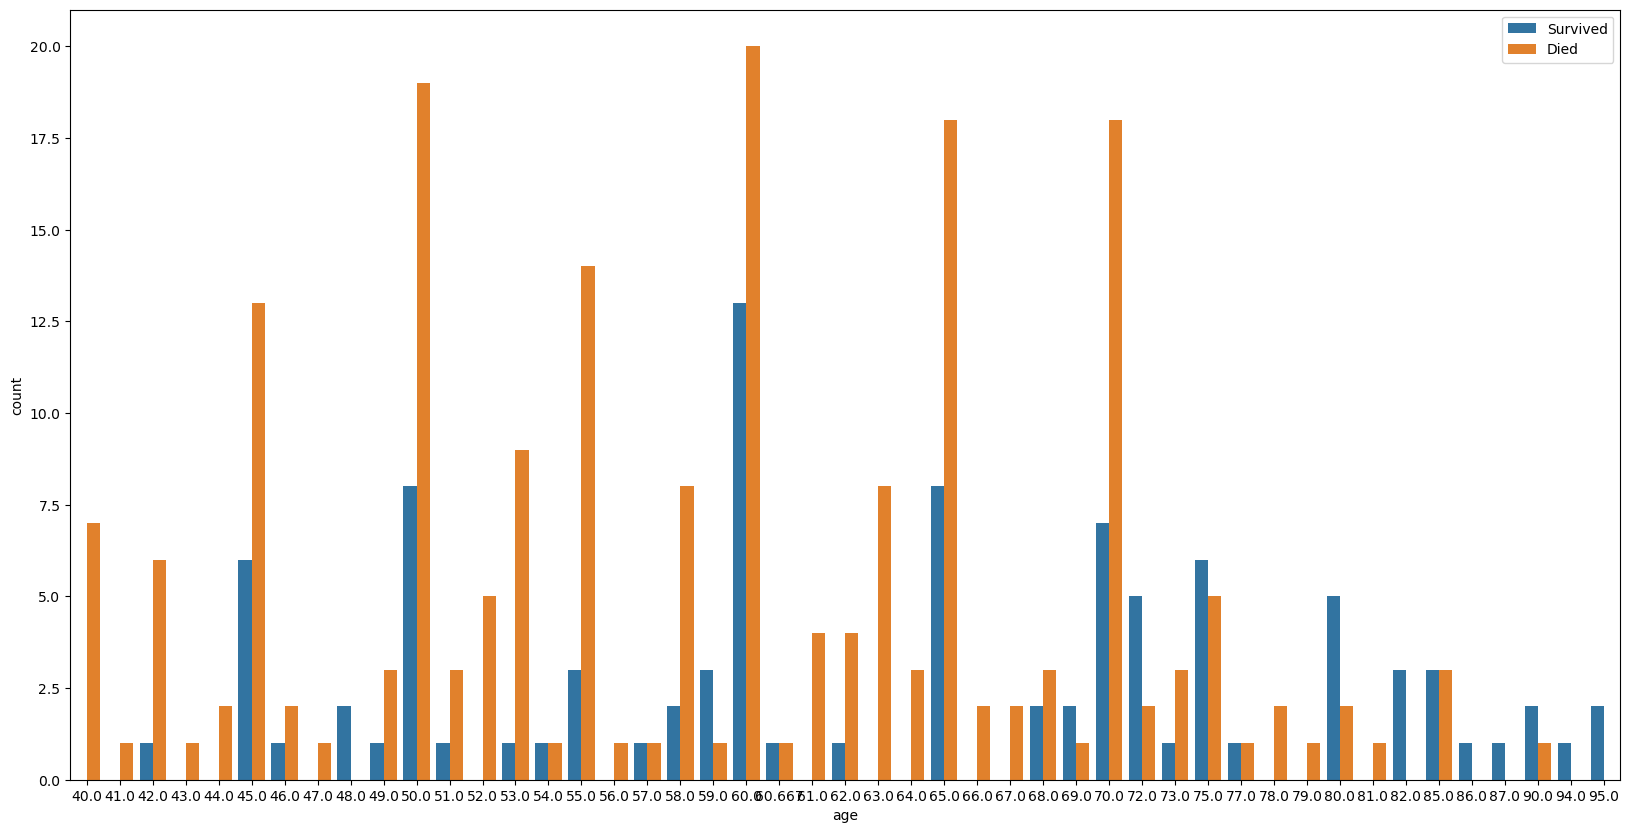

In [97]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'age', data = df, hue='DEATH_EVENT')
plt.legend(labels=["Survived",'Died'])
plt.show()

#Q3:What is the percentage of male and female patients in the dataset?

<Axes: ylabel='count'>

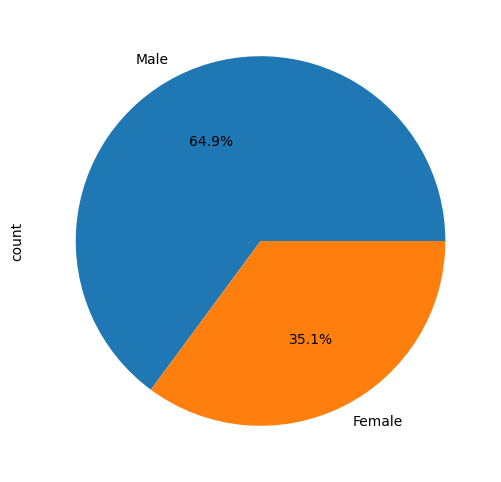

In [98]:
df['sex'].value_counts().plot.pie(y = df['sex'], autopct = '%1.1f%%', figsize = (10, 6))

#Q4: How does the platelet count vary among different age groups?

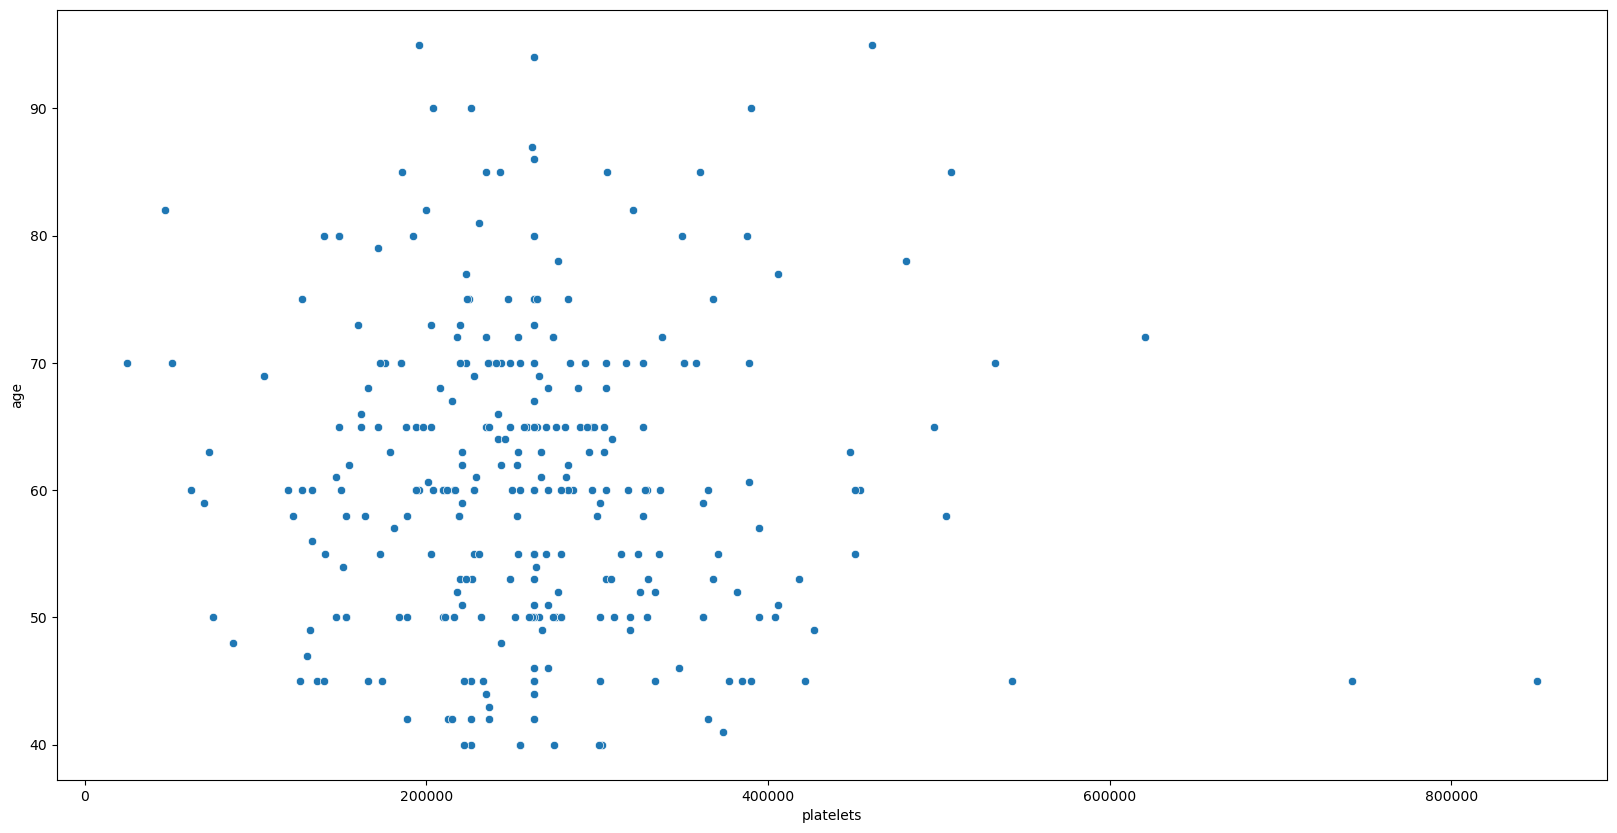

In [83]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'platelets', y='age',data=df)
plt.show()

#Q5:Is there a correlation between creatinine and sodium levels in the blood?

In [17]:
corr_rel = df[['serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase']]

In [18]:
corr_rel

,serum_creatinine,serum_sodium,creatinine_phosphokinase
0,1.9,130,582
1,1.1,136,7861
2,1.3,129,146
3,1.9,137,111
4,2.7,116,160
...,...,...,...
294,1.1,143,61
295,1.2,139,1820
296,0.8,138,2060
297,1.4,140,2413


<Axes: >

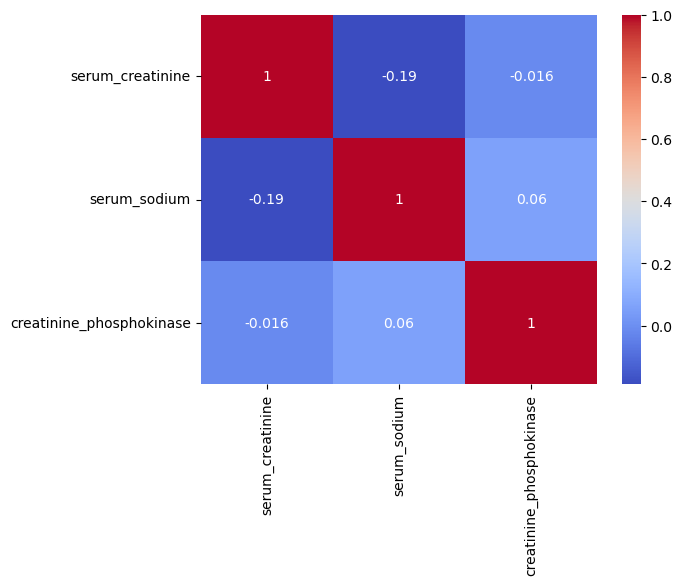

In [19]:
sns.heatmap(corr_rel.corr(), annot = True, cmap = 'coolwarm')

#Q6: How does the prevalence of high blood pressure differ between male and female patients?

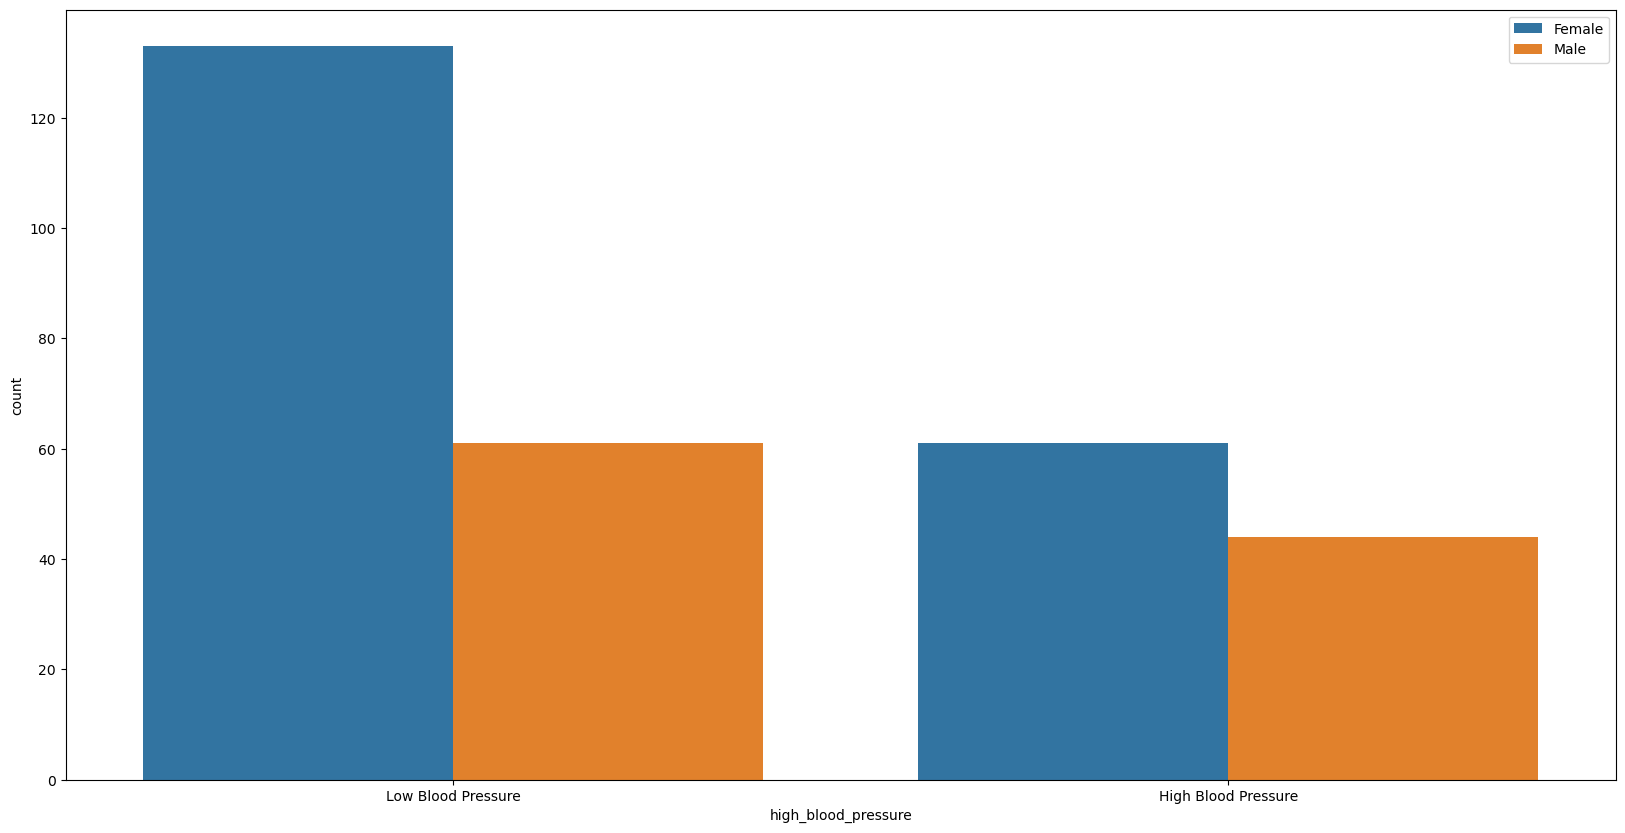

In [84]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'high_blood_pressure', data = df, hue='sex')
plt.xticks([1,0],['High Blood Pressure','Low Blood Pressure'])
plt.legend(labels=["Female",'Male'])
plt.show()

#Q7: What is the relaionship between smoking habits and the occurrence of heart failure ?

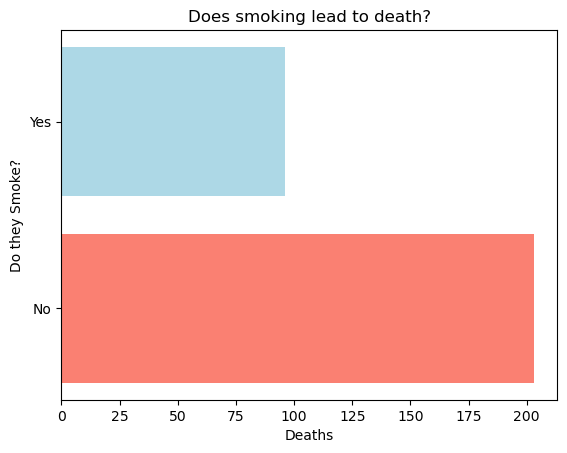

In [85]:
figure_4 = plt.barh(df["smoking"].value_counts().index,df["DEATH_EVENT"].value_counts(), color=["salmon", "lightblue"])
plt.title("Does smoking lead to death?")
plt.xlabel("Deaths")
plt.ylabel("Do they Smoke?")
plt.show()

#Q8:Are there any noticeable patterns in the distribution of death events across different age groups?

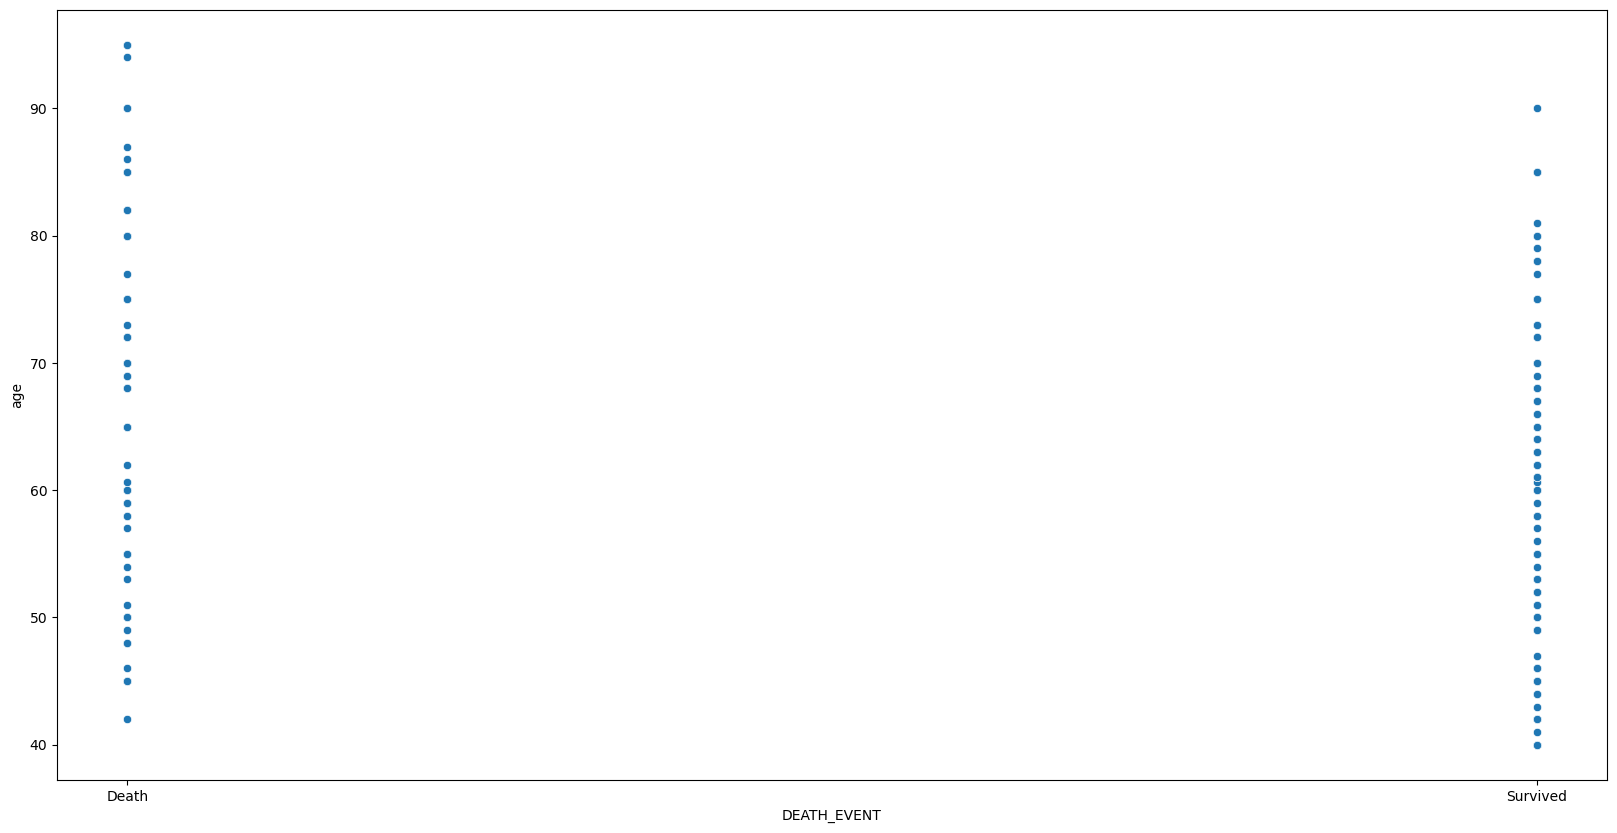

In [100]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'DEATH_EVENT', y='age',data=df)
plt.show()

#Q9: Is there any significant difference in ejection fraction between patients with and without diabetes?

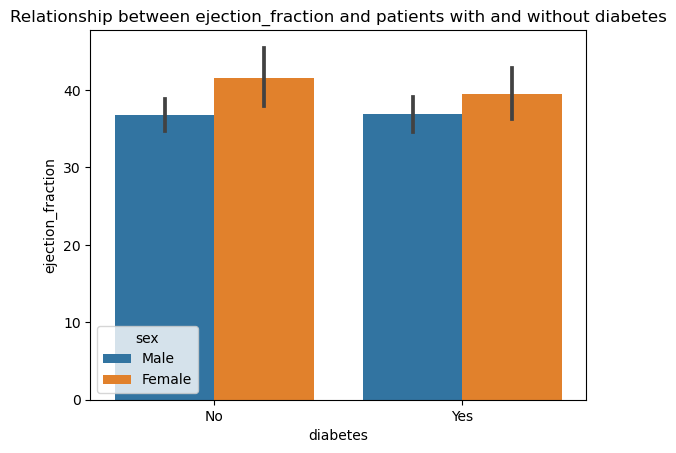

In [88]:

sns.barplot(x = "diabetes",
           y = "ejection_fraction",
           hue = "sex",
           data = df).set(title='Relationship between ejection_fraction and patients with and without diabetes')
plt.show()

#Q10: How does the serum creatinine level vary between patients who survived and those who did not?

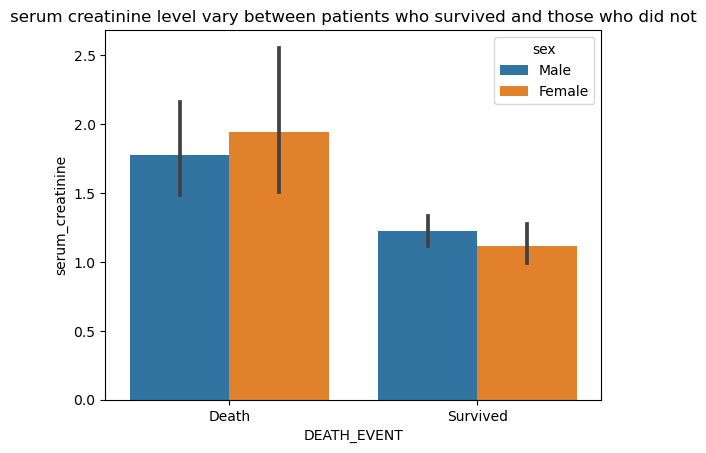

In [99]:
sns.barplot(x = "DEATH_EVENT",
           y = "serum_creatinine",
           hue = "sex",
           data = df).set(title='serum creatinine level vary between patients who survived and those who did not')
plt.show()